In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # 텐서플로우 버전 1로 낮추기 (버전 2 기능 사용불가하게 만들기)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
iris = pd.read_csv("iris.csv", names=['sepal_length','sepal_width','petal_length','petal_width','species'])
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
import seaborn as sns

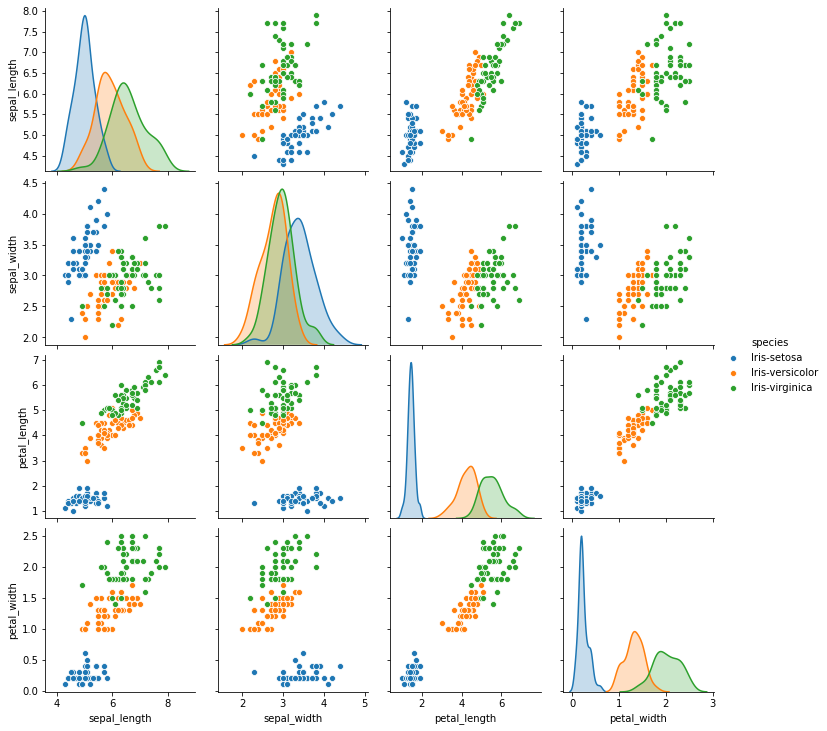

In [5]:
sns.pairplot(iris, hue='species')

In [6]:
# 데이터 섞기
from sklearn.utils import shuffle
df = shuffle(iris)

In [7]:
data = df.values # 데이터프레임 -> 배열(array)
x = data[:,0:4].astype(float)

In [8]:
from sklearn.preprocessing import LabelEncoder
ydata = data[:,4]

le = LabelEncoder()
le.fit(ydata) # 각 종류를 숫자로 fit
y = le.transform(ydata) # 전체 데이터를 fit된 정보로 바꿔줌

In [9]:
y

array([0, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 0, 2, 1, 0,
       0, 2, 0, 2, 2, 0, 0, 2, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 2, 0, 2, 1, 1, 2, 2, 0,
       2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 0, 0, 0, 1, 2,
       1, 0, 0, 0, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 0, 2, 1,
       1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0,
       2, 1, 1, 1, 2, 2, 1, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 0])

In [10]:
y = np_utils.to_categorical(y)
y

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0

In [11]:
print(x.shape)
print(y.shape)

(150, 4)
(150, 3)


In [12]:
# 2.모델 구성 (딥러닝 : 신경망모델 : 입력계층/히든계층/출력계층)
model = Sequential()

# 레이어설계 (input_dim : 입력데이터의 생김새)
# 입력:784, 출력 : 2인 레이어 추가 (add)
model.add(Dense( units=256, input_dim = 4, activation='relu' )) # 입력계층
# 히든계층 (입력계층의 units를 input으로 받아옴)
model.add(Dense( units=128, activation='relu' ))
model.add(Dense( units=64, activation='relu' ))
model.add(Dense( units=8, activation='relu' ))
model.add(Dense( units=3, activation='softmax' ))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [13]:
# 3. 모델 학습과정 설정 # https://keras.io/ko
model.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy']) # loss에는 cost 함수써줌

In [14]:
# 4. 모델 학습시키기
hist = model.fit(x, y, batch_size=32, epochs=50)
"""
# verbose : 진행 바
# callbacks : 콜백함수 : 어떤 상태가 되었을 때 사전에 지정한 함수가 호출됨.
모델을 학습하다가 더이상 좋아지지 않으면(상태)
모델링중단하도록 함.
"""

Train on 150 samples
Epoch 1/50
150/150 [==============================] - 0s 40us/sample - loss: 1.0269 - acc: 0.3333
Epoch 2/50
150/150 [==============================] - 0s 40us/sample - loss: 0.9122 - acc: 0.3400
Epoch 3/50
150/150 [==============================] - 0s 47us/sample - loss: 0.8243 - acc: 0.6667
Epoch 4/50
150/150 [==============================] - 0s 47us/sample - loss: 0.7565 - acc: 0.7067
Epoch 5/50
150/150 [==============================] - 0s 40us/sample - loss: 0.7034 - acc: 0.9533
Epoch 6/50
150/150 [==============================] - 0s 47us/sample - loss: 0.6313 - acc: 0.9400
Epoch 7/50
150/150 [==============================] - 0s 47us/sample - loss: 0.5706 - acc: 0.9200
Epoch 8/50
150/150 [==============================] - 0s 47us/sample - loss: 0.4944 - acc: 0.9733
Epoch 9/50
150/150 [==============================] - 0s 33us/sample - loss: 0.4401 - acc: 0.9400
Epoch 10/50
150/150 [==============================] - 0s 47us/sample - loss: 0.3585 - acc: 0.946

'\n# verbose : 진행 바\n# callbacks : 콜백함수 : 어떤 상태가 되었을 때 사전에 지정한 함수가 호출됨.\n모델을 학습하다가 더이상 좋아지지 않으면(상태)\n모델링중단하도록 함.\n'

In [15]:
# 5. 모델 평가하기
model.evaluate(x, y, batch_size=32)

[0.06089336901903152, 0.9866667]

In [20]:
import numpy as np
# 모델 사용하기 (분류)
yhat = model.predict(x[0:30])
np.sum(yhat[0])
np.max(yhat[0])

# 실제값
print(y[[0,1,29]])
# 예측값
print(np.argmax(yhat[0]))
print(np.argmax(yhat[1]))
print(np.argmax(yhat[29]))

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
0
2
2
